# Bmad to Impact-T

In [1]:
from pytao import Tao
from pmd_beamphysics import FieldMesh
import numpy as np
import os

from pmd_beamphysics.interfaces.impact import create_impact_emfield_cartesian_ele
from impact.interfaces.bmad import tao_create_impact_emfield_cartesian_ele, tao_create_impact_lattice_and_fieldmaps, impact_from_tao
from pmd_beamphysics.fields.corrector_modeling import make_dipole_corrector_fieldmesh 


import matplotlib.pyplot as plt

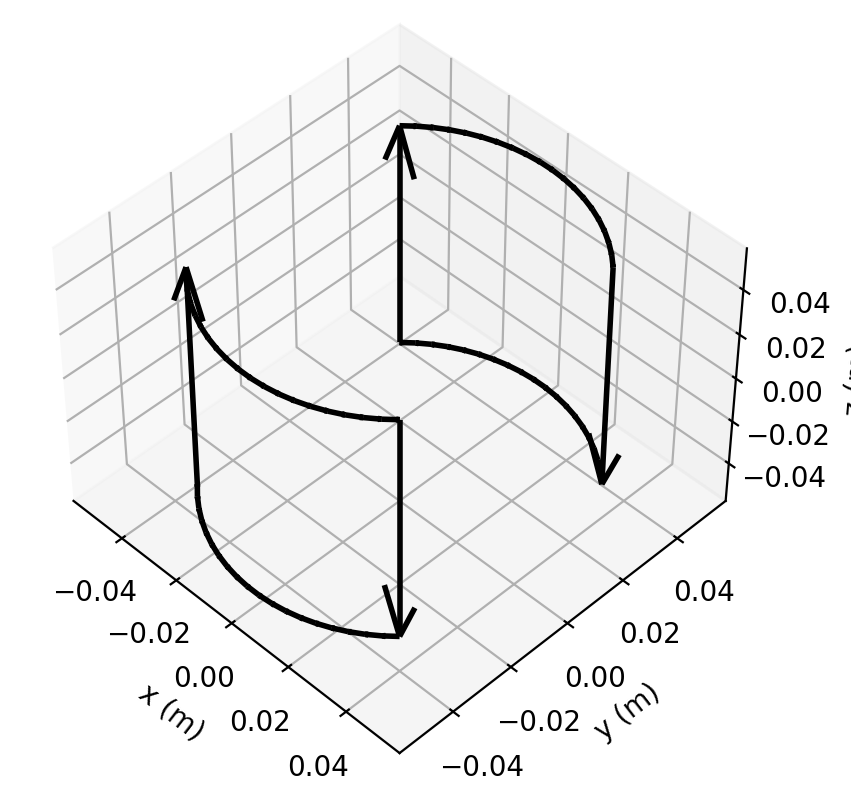

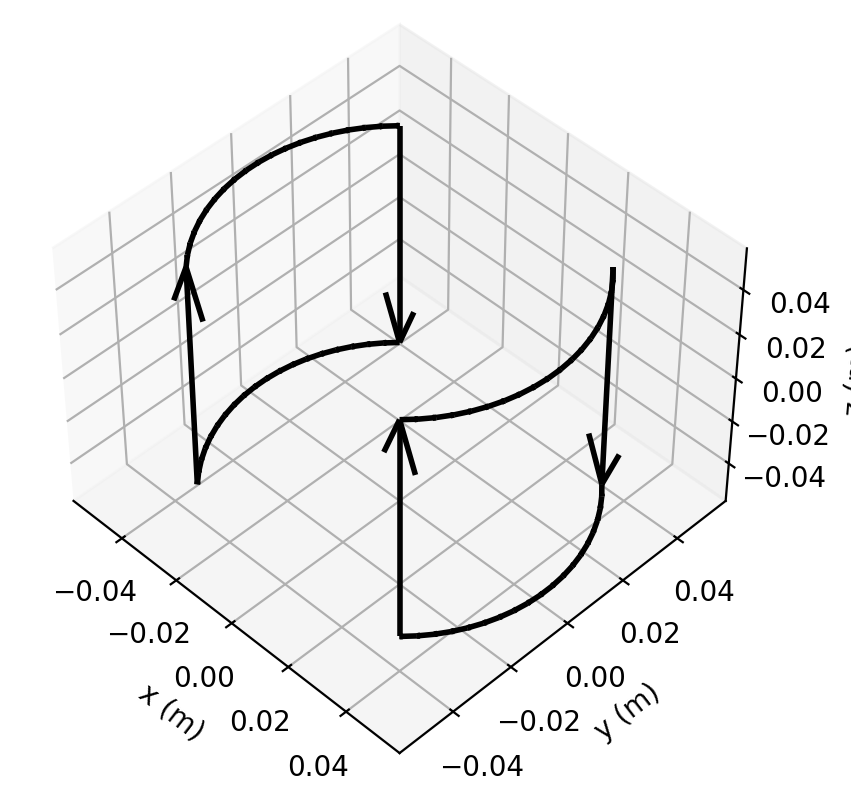

In [2]:
R = 2*2.54e-2      # 2" radius [m]
L = 0.1            # Length along z [m]
theta = np.pi/2    # Opening angle [rad]
current=100          # Current [Amp]

FM1 = make_dipole_corrector_fieldmesh(current=current,
                                     xmin=-R, xmax=R, nx=21,
                                     ymin=-R, ymax=R, ny=21,
                                     zmin=-5*L/2, zmax=5*L/2, nz=101,
                                     mode='saddle',
                                     R=R, L=L, theta=theta, npts=20, 
                                     plot_wire=True,
                                    tilt=0)
FM2 = make_dipole_corrector_fieldmesh(current=current,
                                     xmin=-R, xmax=R, nx=21,
                                     ymin=-R, ymax=R, ny=21,
                                     zmin=-5*L/2, zmax=5*L/2, nz=101,
                                     mode='saddle',
                                     R=R, L=L, theta=theta, npts=20, 
                                     plot_wire=True,
                                    tilt=np.pi/2)



Write for Bmad

In [3]:
FM1.write('correctorcoil_horizontal.h5')
FM2.write('correctorcoil_vertical.h5')

# Run Tao

In [4]:
tao = Tao(lattice_file='lat.bmad', noplot=True)

In [5]:
IX_ELE = 2

In [6]:
grid_params = tao.ele_grid_field(IX_ELE, 1, 'base')
grid_params

{'dr': array([0.00508, 0.00508, 0.005  ]),
 'r0': array([-0.0508, -0.0508, -0.25  ]),
 'master_parameter': '<None>',
 'ele_anchor_pt': 'Center',
 'field_type': 'Magnetic',
 'grid_field^geometry': 'xyz',
 'harmonic': 0,
 'phi0_fieldmap': 0.0,
 'field_scale': 1.0,
 'interpolation_order': 1,
 'curved_ref_frame': False,
 'file': 'correctorcoil_horizontal.h5'}

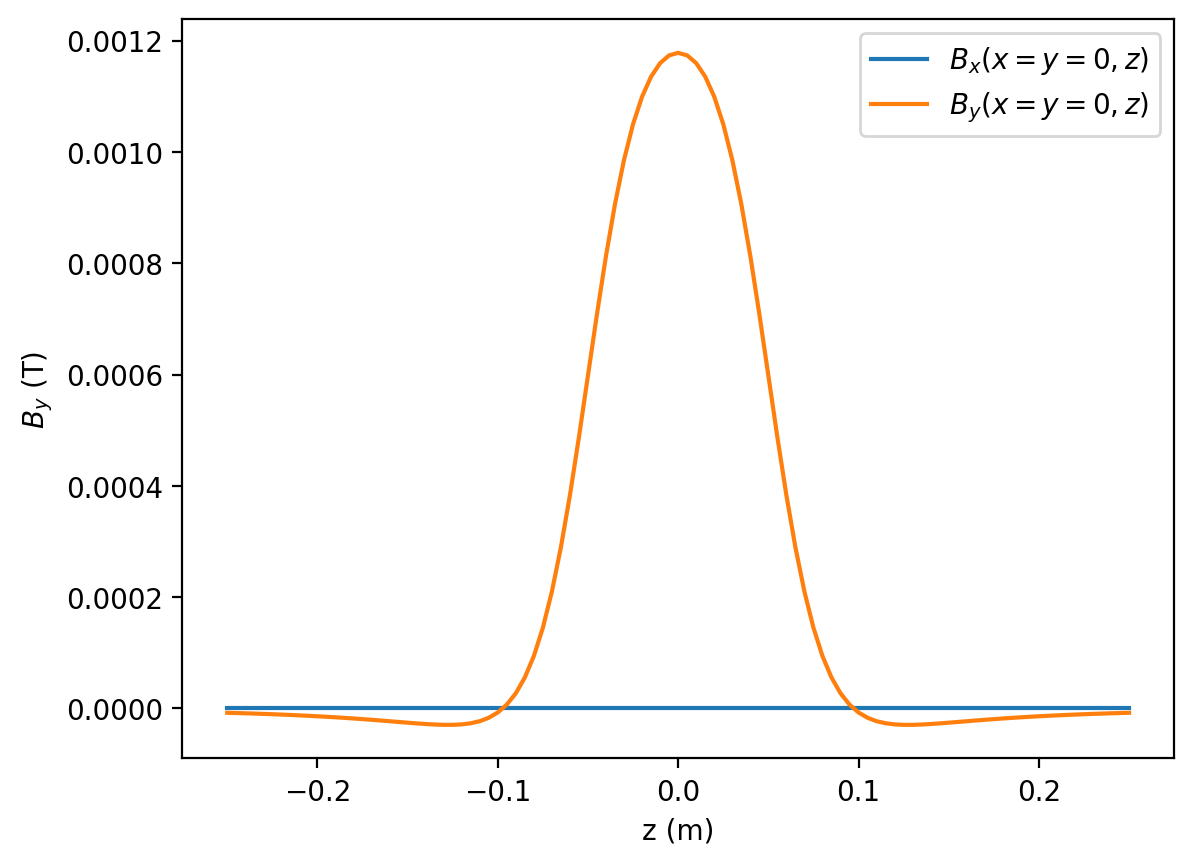

In [7]:
FM = FieldMesh(grid_params['file'])
FM.plot_onaxis(['Bx', 'By'])

In [8]:
tao_create_impact_emfield_cartesian_ele(tao,
                            IX_ELE,
                            file_id=666, 
                            output_path=None,
                            cache=None,
                            name=None
                               )

{'info': {'integral_Bx_dz': np.float64(4.552802091491864e-22),
  'integral_By_dz': np.float64(0.00011352149537307127),
  'integral_Bz_dz': np.float64(1.7830043539702977e-21),
  'integral_Ex_dz': np.float64(0.0),
  'integral_Ey_dz': np.float64(0.0),
  'integral_Ez_dz': np.float64(0.0)},
 'line': '0.5 0 0 111 0.5 0.1 0 0.0 666 0.15 0.0 0.0 0 0 0 /name:HCOIL',
 'ele': {'L': np.float64(0.5),
  'type': 'emfield_cartesian',
  'zedge': np.float64(0.5),
  'rf_field_scale': np.float64(0.1),
  'rf_frequency': 0,
  'theta0_deg': 0.0,
  'filename': '1T666.T7',
  'radius': 0.15,
  'x_offset': 0.0,
  'y_offset': 0.0,
  'x_rotation': 0.0,
  'y_rotation': 0.0,
  'z_rotation': 0.0,
  'name': 'HCOIL',
  's': np.float64(1.0)},
 'fmap': {'info': {'format': 'emfield_cartesian_fieldmesh'},
  'field': <FieldMesh with rectangular geometry and (np.int64(21), np.int64(21), np.int64(101)) shape at 0x159db84a0>}}

In [9]:
tao_create_impact_lattice_and_fieldmaps(tao)

([{'L': np.float64(0.5),
   'type': 'emfield_cartesian',
   'zedge': np.float64(0.5),
   'rf_field_scale': np.float64(0.1),
   'rf_frequency': 0,
   'theta0_deg': 0.0,
   'filename': '1T1.T7',
   'radius': 0.15,
   'x_offset': 0.0,
   'y_offset': 0.0,
   'x_rotation': 0.0,
   'y_rotation': 0.0,
   'z_rotation': 0.0,
   'name': 'HCOIL',
   's': np.float64(1.0)},
  {'L': np.float64(0.5),
   'type': 'emfield_cartesian',
   'zedge': np.float64(1.5),
   'rf_field_scale': np.float64(0.1),
   'rf_frequency': 0,
   'theta0_deg': 0.0,
   'filename': '1T2.T7',
   'radius': 0.15,
   'x_offset': 0.0,
   'y_offset': 0.0,
   'x_rotation': 0.0,
   'y_rotation': 0.0,
   'z_rotation': 0.0,
   'name': 'VCOIL',
   's': np.float64(2.0)}],
 {'1T1.T7': {'info': {'format': 'emfield_cartesian_fieldmesh'},
   'field': <FieldMesh with rectangular geometry and (np.int64(21), np.int64(21), np.int64(101)) shape at 0x159d5f770>},
  '1T2.T7': {'info': {'format': 'emfield_cartesian_fieldmesh'},
   'field': <FieldMesh

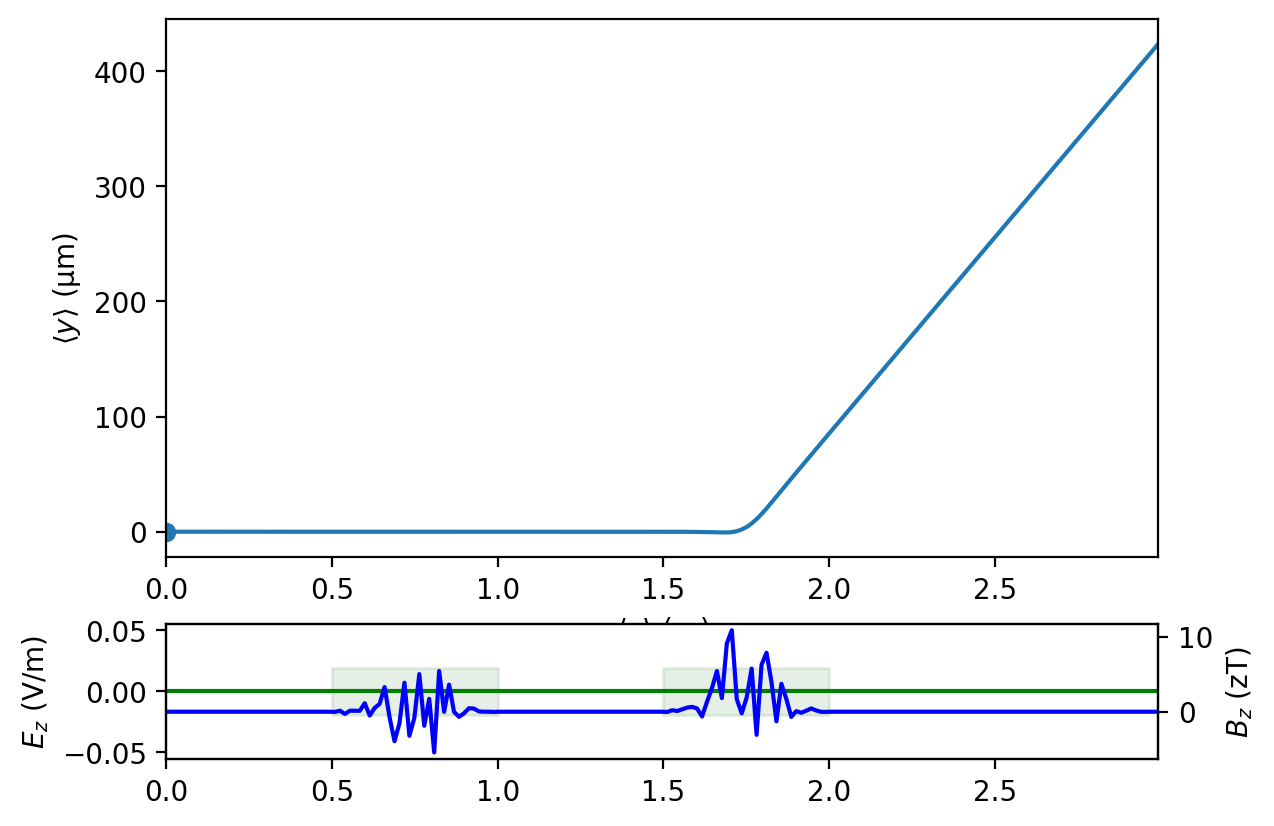

In [10]:
I =impact_from_tao(tao)
I.track1(pz0=10e6)
I.plot('mean_y')

# Compare 

Text(0, 0.5, '$y$ (mm)')

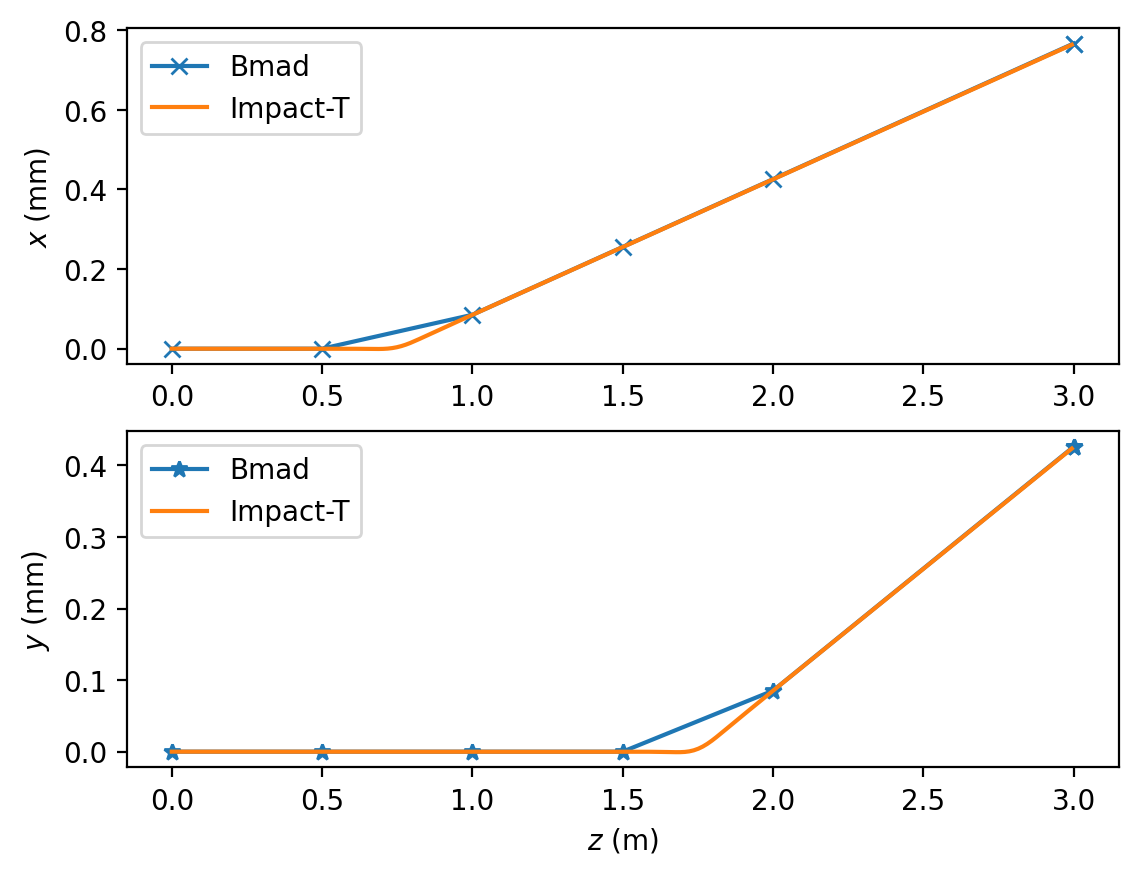

In [11]:
s1 = tao.lat_list('*', 'ele.s')
x1 = tao.lat_list('*', 'orbit.vec.1')
y1 = tao.lat_list('*', 'orbit.vec.3')

z2 = I.stat('mean_z')
x2 = I.stat('mean_x')
y2 = I.stat('mean_y')

fix, axes = plt.subplots(2)
axes[0].plot(s1, x1*1e3, marker='x', label='Bmad')
axes[0].plot(z2, x2*1e3,  label='Impact-T')
axes[0].legend()
axes[1].plot(s1, y1*1e3, marker='*', label='Bmad')
axes[1].plot(z2, y2*1e3,  label='Impact-T')

plt.legend()
axes[1].set_xlabel(r'$z$ (m)')
axes[0].set_ylabel(r'$x$ (mm)')
axes[1].set_ylabel(r'$y$ (mm)')

# Cleanup

In [12]:
os.remove('correctorcoil_horizontal.h5')
os.remove('correctorcoil_vertical.h5')